<a href="https://colab.research.google.com/github/Podinis/Pyhton_10810/blob/main/Sessao5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Parte 1 – Diagnóstico de Qualidade

1 - Carregamento do ficheiro

In [ ]:
file = files.upload()

dataFrame = pd.read_csv("dados_clientes_para_limpeza.csv")

Saving dados_clientes_para_limpeza.csv to dados_clientes_para_limpeza (8).csv


2 - Mostra as primeiras 10 linhas (.head()), .info() e .describe()

In [ ]:
dataFrame.head(10)

,nome_cliente,idade,plano,uso_mb_mensal,cidade,desistiu
0,Ana Lopes,28.0,Pro,1200.0,Lisboa,sim
1,Miguel A.,NaN,Basic,300.0,porto,S
2,Joana,34.0,BASIC,NaN,Porto,y
3,ana lopes,28.0,Pro,1200.0,LISBOA,Sim
4,Carla,900.0,Pro,2500.0,lisboaa,SIM
5,Rui,40.0,Basico,380.0,Braga,não
6,Diogo,19.0,pro,-200.0,Faro,N
7,Paula,23.0,Gold,310.0,lisboa,no
8,Inês Sofia,999.0,Basic,NaN,lisboaa,não
9,João João,NaN,Basic,NaN,Porto,sim


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome_cliente   108 non-null    object 
 1   idade          56 non-null     float64
 2   plano          108 non-null    object 
 3   uso_mb_mensal  53 non-null     float64
 4   cidade         108 non-null    object 
 5   desistiu       105 non-null    object 
dtypes: float64(2), object(4)
memory usage: 5.2+ KB


In [ ]:
dataFrame.describe()

,idade,uso_mb_mensal
count,56.000000,53.000000
mean,465.410714,993.867925
std,480.241257,971.613231
min,19.000000,-398.000000
25%,34.750000,154.000000
50%,59.000000,984.000000
75%,999.000000,1564.000000
max,999.000000,2969.000000


3 - Responde às perguntas (com print() ou markdown):

In [ ]:
dataFrame.isna().sum()

,0
nome_cliente,0
idade,52
plano,0
uso_mb_mensal,55
cidade,0
desistiu,3


In [ ]:
print('Estão em falta', dataFrame.isna().sum().sum(), 'valores')

Estão em falta 110 valores


In [ ]:
print('Estão duplicados ', dataFrame.duplicated().sum(), ' valores')

Estão duplicados  0  valores


Há idades ou tráfegos móveis fora do comum?')

Sim tem idades com 999 anos e trafego negativo

In [ ]:
print('Que valores existem na coluna desistiu?')
print(dataFrame['desistiu'].unique())


Que valores existem na coluna desistiu?
['sim' 'S' 'y' 'Sim' 'SIM' 'não' 'N' 'no' 'Não' 'n' 'yes' nan]


## Parte 2

4 - Remove duplicados (mesmo nome com variações como “Ana Lopes” vs “ana lopes”)

Dica: usar .str.lower() antes de verificar duplicados na coluna nome_cliente.

In [ ]:
dataFrame['nome_cliente'] = dataFrame['nome_cliente'].str.lower()
dataFrame.drop_duplicates(inplace=True)


5 - Preenche dados ausentes: <br>
    idade: média <br>
    uso_mb_mensal: mediana

In [ ]:
#dataFrame['idade'].fillna(dataFrame['idade'].mean(), inplace=True) // Estava a dar um warning então mudei o metodo como estava recomendado
#dataFrame['uso_mb_mensal'].fillna(dataFrame['uso_mb_mensal'].median(), inplace=True)

dataFrame.fillna({'idade':dataFrame['idade'].mean()},inplace=True)
dataFrame.fillna({'uso_mb_mensal':dataFrame['uso_mb_mensal'].median()},inplace=True)


In [ ]:
dataFrame['desistiu'] = dataFrame['desistiu'].fillna("0")

In [ ]:
dataFrame.isna().sum()

,0
nome_cliente,0
idade,0
plano,0
uso_mb_mensal,0
cidade,0
desistiu,0


6 - Corrige valores extremos:<br>
idade: deve estar entre 16 e 100<br>
uso_mb_mensal: deve estar entre 0 e 5000MB<br>
Se valores estiverem fora disso → substituir pela média da coluna<br>

In [ ]:
# Filtrando as idades entre 16 e 100
idades_filtradas = dataFrame[(dataFrame['idade'] > 16) & (dataFrame['idade'] < 100)]
# Calculando a média
media_idade = idades_filtradas['idade'].mean()
media_mb_mensal=dataFrame['uso_mb_mensal'].mean()

dataFrame['idade']=np.where(dataFrame['idade']<16, media_idade, dataFrame['idade'])
dataFrame['idade']=np.where(dataFrame['idade']>100, media_idade, dataFrame['idade'])


dataFrame['uso_mb_mensal']=np.where(dataFrame['uso_mb_mensal']<0, media_mb_mensal, dataFrame['uso_mb_mensal'])
dataFrame['uso_mb_mensal']=np.where(dataFrame['uso_mb_mensal']>5000, media_mb_mensal, dataFrame['uso_mb_mensal'])


In [ ]:
print(media_idade)

38.29032258064516


7 - Normaliza a coluna plano:<br>
Corrige variações como “BASIC”, “Basico”, “pro” → para “Basic”, “Pro”, etc.

In [ ]:
dataFrame['plano'].replace({"BASIC":"Basic", "Basico":"Basic", "pro": "Pro"})

,plano
0,Pro
1,Basic
2,Basic
3,Pro
4,Pro
...,...
103,Pro
104,Basic
105,Pro
106,Gold


8 - Corrige e uniformiza a coluna cidade:<br>
“lisboaa” → “Lisboa”, “porto” → “Porto”, etc.

In [ ]:
dataFrame['cidade'].unique()

array(['Lisboa', 'Porto', 'Braga', 'Faro', 'Coimbra'], dtype=object)

In [ ]:
dataFrame['cidade']=dataFrame['cidade'].replace({"lisboaa":"Lisboa", "lisboaa":"Lisboa","LISBOA":"Lisboa","lisboa":"Lisboa", "porto": "Porto"})
dataFrame['cidade'].unique()

array(['Lisboa', 'Porto', 'Braga', 'Faro', 'Coimbra'], dtype=object)

9 - Normaliza a coluna desistiu:<br>
“sim”, “s”, “y” → 1 <br>
“não”, “n”, “no” → 0 <br>

In [ ]:
dataFrame['desistiu'] = dataFrame['desistiu'].replace(["sim","S","y","Sim","SIM","yes"], 1)
dataFrame['desistiu'] = dataFrame['desistiu'].replace(["não","N","no","Não","n"], 0)

10 - Corrige o tipo de dados de todas as colunas, se necessário.

In [ ]:
dataFrame['idade']=dataFrame['idade'].astype(int)
dataFrame['uso_mb_mensal']=dataFrame['uso_mb_mensal'].astype(int)
dataFrame.dtypes

,0
nome_cliente,object
idade,int64
plano,object
uso_mb_mensal,int64
cidade,object
desistiu,object


## Parte 3 – Pronto para a IA?

11 - Verifica se está pronto para ML: <br>

Nenhum valor ausente<br>
Todos os campos limpos e coerentes<br>
desistiu como 0 e 1<br>
idade, uso_mb_mensal numéricos<br>

In [ ]:
print('Valores nulos:', dataFrame.isna().sum().sum() )

Valores nulos: 0


In [ ]:
dataFrame.head(10)

,nome_cliente,idade,plano,uso_mb_mensal,cidade,desistiu
0,ana lopes,28,Pro,1200,Lisboa,1
1,miguel a.,38,Basic,300,Porto,1
2,joana,34,BASIC,984,Porto,1
3,ana lopes,28,Pro,1200,Lisboa,1
4,carla,38,Pro,2500,Lisboa,1
5,rui,40,Basico,380,Braga,0
6,diogo,19,pro,988,Faro,0
7,paula,23,Gold,310,Lisboa,0
8,inês sofia,38,Basic,984,Lisboa,0
9,joão joão,38,Basic,984,Porto,1


13 - Cria um gráfico com seaborn para ver a distribuição de uso mensal vs / desistência:

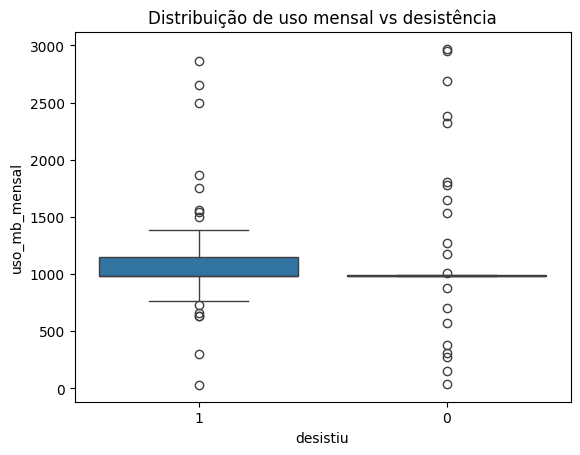

In [ ]:
sns.boxplot(x='desistiu', y='uso_mb_mensal', data=dataFrame)
plt.title('Distribuição de uso mensal vs desistência')
plt.show()